In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
ls

dataset/  dataset.zip  helper.py  mrcnn/  __pycache__/  train_fake.ipynb


In [3]:
# cd /content/drive/'My Drive'/Colab_Notebooks/

/content/drive/My Drive/Colab_Notebooks


In [0]:
# !unzip dataset.zip

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [5]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import helper 
import pickle
from helper import seprateImagesInClasses, creatELADataSet
import shutil
import glob

%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

Using TensorFlow backend.


In [0]:
flag = 'colab'

if 'colab' == flag:
  root_dir = '/content/drive/My Drive/Colab_Notebooks'
elif 'linux' == flag:
  root_dir = os.path.abspath("/home/g1g/Desktop/splice-detection")
else:
  root_dir = os.path.abspath(r"d:/home/g1g/Desktop/splice-detection")

# baseDataSetPath = os.path.join(root_dir, 'dataset')
dataSetPath = os.path.join(root_dir, 'dataset')

manipulated = 'manipulated'
non_manipulated = 'non_manipulated'


# X, Y, Xp, Yp = creatELADataSet(dataSetPath)

In [0]:


# save pickle
# with open('ELAdataset.pickle', 'wb') as f:
#     pickle.dump((X, Y, Xp, Yp), f)

# load pickl()

with open('ELAdataset.pickle', 'rb') as f:
    X, Y, Xp, Yp = pickle.load(f)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(Xp, Yp, test_size = 0.2, random_state=5)

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
  
model.summary()




Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)       



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1393 samples, validate on 349 samples
Epoch 1/50





 - 14s - loss: 0.6257 - acc: 0.6648 - val_loss: 0.5434 - val_acc: 0.7077
Epoch 2/50
 - 3s - loss: 0.5075 - acc: 0.7200 - val_loss: 0.4793 - val_acc: 0.7278
Epoch 3/50
 - 3s - loss: 0.3979 - acc: 0.8155 - val_loss: 0.3904 - val_acc: 0.8453
Epoch 4/50
 - 3s - loss: 0.3065 - acc: 0.8808 - val_loss: 0.3656 - val_acc: 0.8453
Epoch 5/50
 - 3s - loss: 0.2472 - acc: 0.9045 - val_loss: 0.3255 - val_acc: 0.8711
Epoch 6/50
 - 3s - loss: 0.1900 - acc: 0.9347 - val_loss: 0.2993 - val_acc: 0.8797
Epoch 7/50
 - 3s - loss: 0.1726 - acc: 0.9447 - val_loss: 0.2736 - val_acc: 0.9112
Epoch 8/50
 - 3s - loss: 0.1298 - acc: 0.9598 - val_loss: 0.2698 - val_acc: 0.9083
Epoch 9/50
 - 3s - loss: 0.1032 - acc: 0.9706 - val_loss: 0.2619 - val_acc: 0.9140
Epoch 10/50
 - 3s - loss: 0.0978 - acc: 0.9698 - val_loss: 0.2570 - val_acc: 0.9112
Epoch 11/50
 - 3s

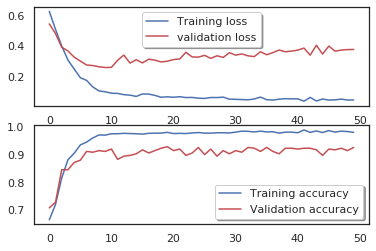

In [9]:
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#early_stopping = EarlyStopping(monitor='val_acc',
#                              min_delta=0,
#                              patience=2,
#                              verbose=0, mode='auto')

epochs = 50
batch_size = 100
#callbacks=[early_stopping]
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2, shuffle=True)

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
